In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

# Linear Regresssion with Multiple Variables 

In [53]:
data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Print out some data points
print ('First 10 examples from the dataset:\n')
for i in range(10):
    print ('x =', X[i, ], ', y =', y[i])

First 10 examples from the dataset:

x = [2104.    3.] , y = 399900.0
x = [1600.    3.] , y = 329900.0
x = [2400.    3.] , y = 369000.0
x = [1416.    2.] , y = 232000.0
x = [3000.    4.] , y = 539900.0
x = [1985.    4.] , y = 299900.0
x = [1534.    3.] , y = 314900.0
x = [1427.    3.] , y = 198999.0
x = [1380.    3.] , y = 212000.0
x = [1494.    3.] , y = 242500.0


# Normalizing Features  

In [54]:

def feature_normalize(X):
  
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [55]:
X, mu, sigma = feature_normalize(X)
X = np.hstack((np.ones((m, 1)), X))

# Gradient Descent 

In [56]:
# Choose some alpha value
alpha = 0.15
num_iters = 400

# Init theta and run gradient descent
theta = np.zeros(3)

#### The compute_cost_multi() computes the cost for linear regression with multiple variables in a vectorized way.

 

In [57]:
def compute_cost_multi(X, y, theta):
   
    m = len(y)
    diff = X.dot(theta) - y
    J = 1.0 / (2 * m) * diff.T.dot(diff)
    return J

#### The gradient_descent_multi() performs the gradient descent to select the best theta.



In [58]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
  
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X))
        J_history[i] = compute_cost_multi(X, y, theta)

    return theta, J_history

##### Run gradient descent with given parameters:

In [59]:
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

### Plot

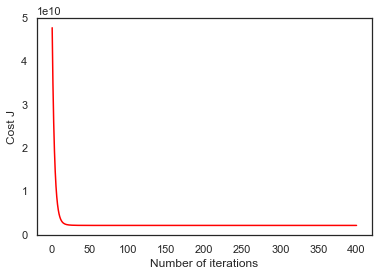

In [60]:

plt.figure()
plt.plot(range(1, num_iters + 1), J_history, color='r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

### Display the theta:



In [61]:
print ('Theta computed from gradient descent:')
print (theta)

Theta computed from gradient descent:
[340412.65957447 110631.0502787   -6649.47427067]


#### Estimate the price of a 1650 sq-ft, 3 br house:

In [111]:
y_pred = []
for i in np.arange(m-1): 
    size = np.random.randint(900,5000)
    bed = np.random.randint(1,5)
    normalize_test_data = ((np.array([size, bed]) - mu) / sigma)
    normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
    y_pred[i] = normalize_test_data.dot(theta)
    


IndexError: list assignment index out of range

In [107]:
y_pred

[]

# Normal Equations

In [65]:

data = np.loadtxt(open("ex1data2.txt", "r"), delimiter=",")
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

# Add intercept term to X
X = np.hstack((np.ones((m, 1)), X))

In [68]:
def normal_eqn(X, y):
    
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [70]:
theta = normal_eqn(X, y)
print ('Theta computed from the normal equations: ')
print (theta)

Theta computed from the normal equations: 
[89597.90954355   139.21067402 -8738.01911255]


In [71]:
price = np.array([1, 1650, 3]).dot(theta)
print ('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.464334972
